# Project: No-show appointments
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This dataset collects information of moives released between 2011 to 2014 and is focused on the question which moive is the most popular and most profitable.

* popularity tells us the popularity score of the moives.
* budget indicates the amount that was used to produce the moives.
* revenue indicates the amount mades after releasing the moives.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing the necessary libraries needed

In [58]:
df = pd.read_csv('tmdb-movies.csv')

#loading my dataset

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [59]:
df.head(4)
#to view the first 4 details of my dataset am working with

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


In [60]:
df.columns
#to see the column names

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [61]:

df.info()

#to get the dataset informations
#he columns 'budget', 'revenue', 'budget_adj', 'revenue_adj' has not given.
#But for this dataset i will assume the currency is in US dollar.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [62]:
df.describe()

#statistical information of the numeric variables

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [63]:
# dropping columns that are not neccessary for my analysis
# the colmns are imdb_id,budget_adj ,revenue_adj

df.drop(['imdb_id','budget_adj' ,'revenue_adj'],axis=1,inplace =True)

In [64]:
df.drop(['tagline','homepage','keywords','production_companies'],axis=1,inplace=True)

#dropping columns with incompelete information

In [65]:
df.info()
#confirming if it successfully dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
overview          10862 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


In [66]:
df.isnull().sum()
#total null  values in the dataset

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
overview           4
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [67]:
sum(df.duplicated())

#check if there is any duplicates in the dataset

1

In [68]:
df.drop_duplicates()
#drop the duplicate sum(df.duplicated())

#check if there is any duplicates in the dataset

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015
9,150540,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,6/9/15,3935,8.0,2015


In [69]:
# convert realesed_date to date and time format because its showing as a string
df['release_date'] = pd.to_datetime(df['release_date'])


In [70]:

df = df[df["cast"].isnull() == False]
df = df[df["genres"].isnull() == False]

#removing nan values from cast column, keeping only movies, that has casted actors

In [71]:
df.info()
#to know if released_date have been converted to datetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10768 entries, 0 to 10865
Data columns (total 14 columns):
id                10768 non-null int64
popularity        10768 non-null float64
budget            10768 non-null int64
revenue           10768 non-null int64
original_title    10768 non-null object
cast              10768 non-null object
director          10732 non-null object
overview          10765 non-null object
runtime           10768 non-null int64
genres            10768 non-null object
release_date      10768 non-null datetime64[ns]
vote_count        10768 non-null int64
vote_average      10768 non-null float64
release_year      10768 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 1.2+ MB


In [72]:
df.head(3)

#review the cleaned dataset

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015


<a id='eda'></a>
## Exploratory Data Analysis

### Which year has the highest release of movies?

In [73]:
df[ 'release_year'].value_counts().head()

#shows that 2014 has the most movies 


2014    687
2013    653
2015    620
2012    576
2011    532
Name: release_year, dtype: int64

Text(0, 0.5, 'numbers of movie productions')

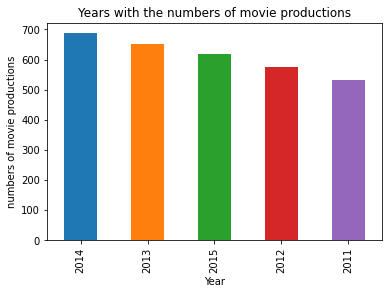

In [74]:
df[ 'release_year'].value_counts().head().plot(kind='bar')
plt.title('Years with the numbers of movie productions')
plt.xlabel('Year')
plt.ylabel('numbers of movie productions')
#to be more visualistic. shows 2014 recorded highest movie production followed
# by 

### Which Movie Has The Highest Or Lowest Profit?

In [75]:
#to add a new column that will give us the profit.call the new column 
#profit..gotten if we subtract budget from revenue
df['profit'] =df['revenue'] - df['budget']

df[ df['profit'] == max(df['profit'])]['original_title']
#finding who has most profit
#The movie 'Avatar' has the highest profit

1386    Avatar
Name: original_title, dtype: object

The movie `Avatar` has the highest profit

In [76]:
##finding who has less profit
#'The Warrior's Way' movie has the lowest profit
df[df['profit'] == min(df['profit'])]['original_title']

2244    The Warrior's Way
Name: original_title, dtype: object

The movie `The Warrior's Way` has the lowest profit

### Top Movies based on their popularity

In [77]:
#Create a function to plot bar chart
def plot_bar_chart(x,y,title,x_label,y_label):
    plt.bar(x, y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=60);

    plt.show()

In [78]:
top_5_populate = df.sort_values(by='popularity', ascending=False).head()

In [79]:
top_5_populate

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,228436354
629,157336,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,Interstellar chronicles the adventures of a gr...,169,Adventure|Drama|Science Fiction,2014-11-05,6498,8.0,2014,456752480
630,118340,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,"Light years from Earth, 26 years after being a...",121,Action|Science Fiction|Adventure,2014-07-30,5612,7.9,2014,603312399
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,185238201


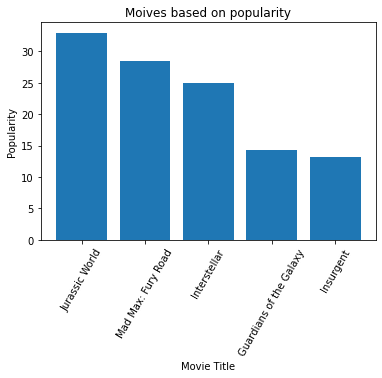

In [80]:
plot_bar_chart(top_5_populate['original_title'], 
               top_5_populate['popularity'],
              'Moives based on popularity',
              'Movie Title',
              'Popularity')

From the graph above, we can see that the moive `Jurassic World` is the most popular movie 

In [81]:
top_5_profitable = df.sort_values(by='profit', ascending=False).head()

In [82]:
top_5_profitable

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,profit
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009,2544505847
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1868178225
5231,597,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,1997-11-18,4654,7.3,1997,1645034188
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1316249360


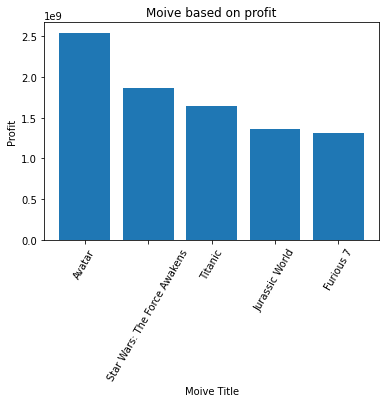

In [83]:
plot_bar_chart(top_5_profitable['original_title'], 
               top_5_profitable['profit'],
              'Moive based on profit',
              'Moive Title',
              'Profit')

From the graph above, we can see that the moive 'Avatar' is the most profitable movie

<a id='conclusions'></a>
## Conclusions
 * Majority of the patient are female
 * There are no stong data to indicate why patient refuse to addtend the medical appointment
 * I believe by gathering more data we can know why patient refuse to come 